In [92]:
import pandas as pd
import numpy as np

In [93]:
df = pd.read_csv(r"./spam.csv",encoding='ISO-8859-1')

In [94]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2673,ham,"Good afternoon, my boytoy ... How are you feel...",NaN,NaN,NaN
3178,ham,Does cinema plus drink appeal tomo? * Is a fr ...,NaN,NaN,NaN
1546,ham,Shant disturb u anymore... Jia you...,NaN,NaN,NaN
2912,ham,Kindly send some one to our flat before &lt;D...,NaN,NaN,NaN
5528,ham,Its just the effect of irritation. Just ignore it,NaN,NaN,NaN


In [95]:
df.shape

(5572, 5)

1. Data Cleaning
2. EDA
3. Text Preprocessing
4. Model Building
5. Model Evaluation
6. Improvement
7. Website
8. Deploy

# 1. Data Cleaning

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [97]:
# drop last 3 columns
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [98]:
df.sample(5)

,v1,v2
2855,ham,"Japanese Proverb: If one Can do it, U too Can ..."
5043,ham,"Dunno, my dad said he coming home 2 bring us o..."
2447,ham,Tmr then Ì_ brin lar... Aiya later i come n c ...
4974,ham,Yar... I tot u knew dis would happen long ago ...
4453,ham,I'm home. Ard wat time will u reach?


In [99]:
# rename column name
df.rename(columns={"v1":"target","v2":"text"},inplace=True)

In [100]:
df.sample(5)

,target,text
4880,ham,When/where do I pick you up
5284,ham,Sent me ur email id soon
1586,ham,There are no other charges after transfer char...
2908,spam,URGENT! Your Mobile number has been awarded wi...
5165,ham,ÌÏ still got lessons? ÌÏ in sch?


In [101]:
from sklearn.preprocessing import LabelEncoder

In [102]:
encoder = LabelEncoder()

In [103]:
df["target"] =  encoder.fit_transform(df["target"])

In [104]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [105]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [106]:
# duplicate values
df.duplicated().sum()

403

In [107]:
df = df.drop_duplicates(keep='first')

In [108]:
df.duplicated().sum()

0

In [109]:
df.shape

(5169, 2)

# 2. EDA

In [110]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [111]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [112]:
import matplotlib.pyplot as plt

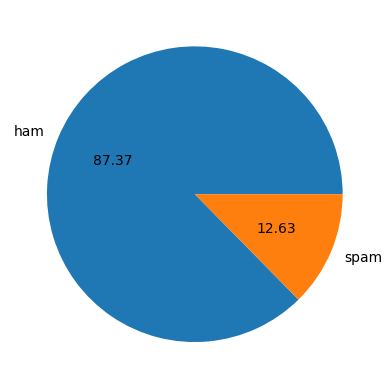

In [113]:
plt.pie(df["target"].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show()

In [114]:
# Data is skewed

In [115]:
import nltk

In [116]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [117]:
# num of characters
df["num_of_characters"] = df["text"].apply(len)

In [118]:
df.head()

,target,text,num_of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [119]:
# num of words
df["num_of_words"] = df["text"].apply(lambda x: len(nltk.word_tokenize(x)))

In [120]:
# num of sentences
df["num_of_sentences"] = df["text"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [121]:
df.head()

,target,text,num_of_characters,num_of_words,num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [122]:
df[["num_of_characters","num_of_words","num_of_sentences"]].describe()

,num_of_characters,num_of_words,num_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [123]:
# ham
df[df["target"] == 0][["num_of_characters","num_of_words","num_of_sentences"]].describe()

,num_of_characters,num_of_words,num_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [124]:
# spam
df[df["target"] == 1][["num_of_characters","num_of_words","num_of_sentences"]].describe()

,num_of_characters,num_of_words,num_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [125]:
import seaborn as sns

<Axes: xlabel='num_of_characters', ylabel='Count'>

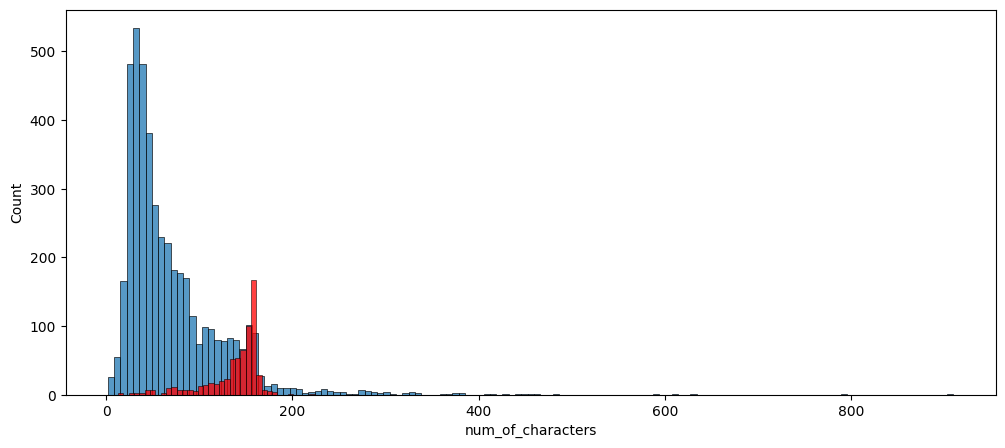

In [126]:
plt.figure(figsize=(12,5))
sns.histplot(df[df["target"] == 0]["num_of_characters"])
sns.histplot(df[df["target"] == 1]["num_of_characters"],color="red")

<Axes: xlabel='num_of_words', ylabel='Count'>

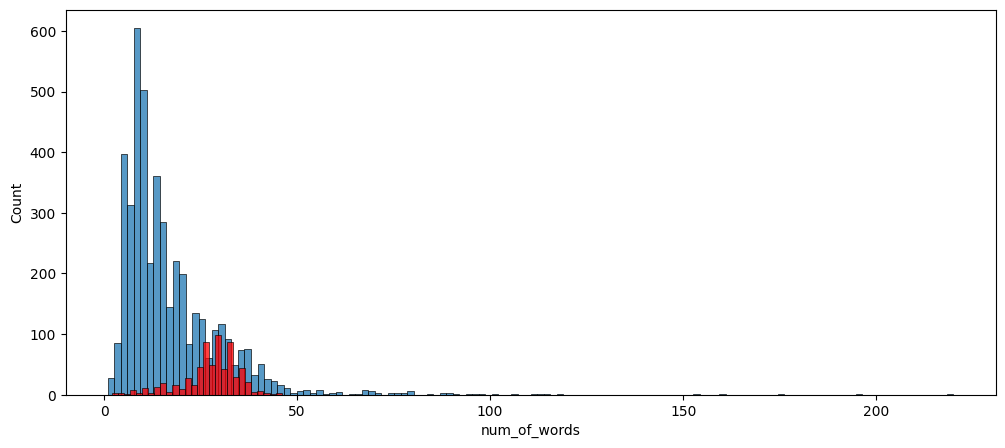

In [127]:
plt.figure(figsize=(12,5))
sns.histplot(df[df["target"] == 0]["num_of_words"])
sns.histplot(df[df["target"] == 1]["num_of_words"],color="red")

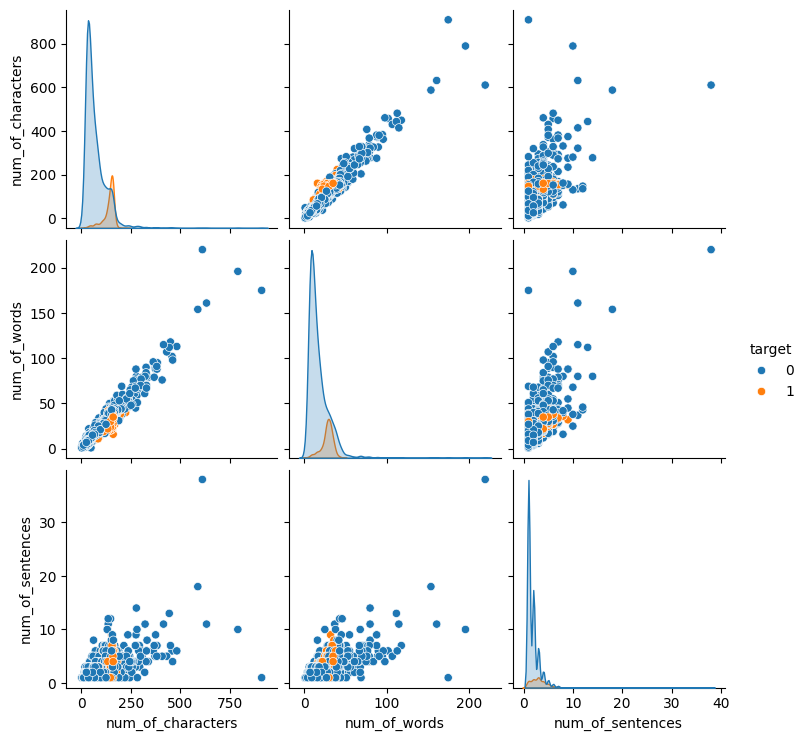

In [128]:
sns.pairplot(df,hue="target")

<Axes: >

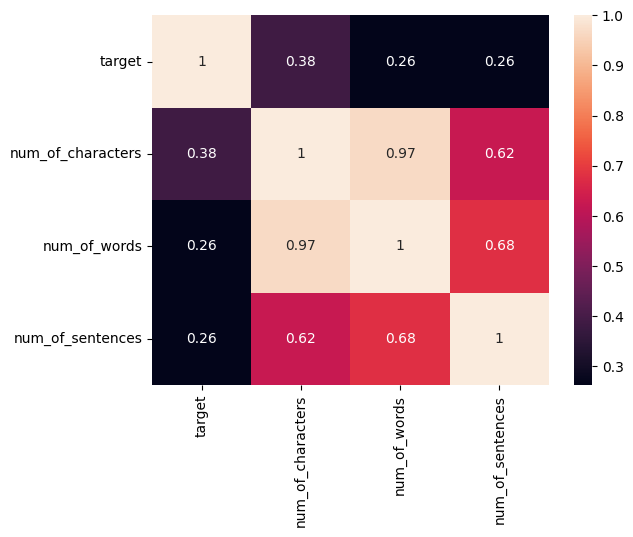

In [129]:
sns.heatmap(df.select_dtypes(exclude="object").corr(),annot=True)

# 3. Data Processing
1)  Lower case
2)  Tokenization
3)  Removing special characters
4)  Removing stop words & punction
5)  stemming

In [130]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [131]:
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer

In [132]:
ps = PorterStemmer()

In [133]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [134]:
df["transformed_text"] = df["text"].apply(transform_text)

In [135]:
df.head()

,target,text,num_of_characters,num_of_words,num_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [136]:
from wordcloud import WordCloud

In [137]:
wc = WordCloud(width=500,height=500,background_color="White",min_font_size=10)

In [138]:
spam_wordcloud = wc.generate(df[df["target"]==1]["transformed_text"].str.cat(sep=" "))

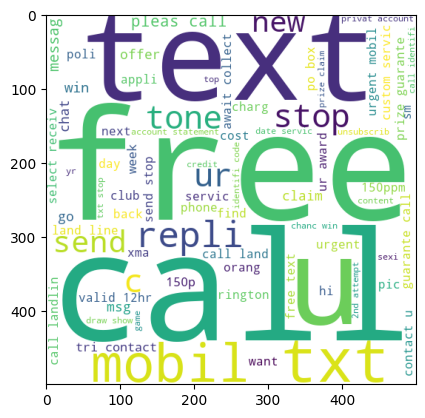

In [139]:
plt.imshow(spam_wordcloud)

In [140]:
ham_wordcloud = wc.generate(df[df["target"]==0]["transformed_text"].str.cat(sep=" "))

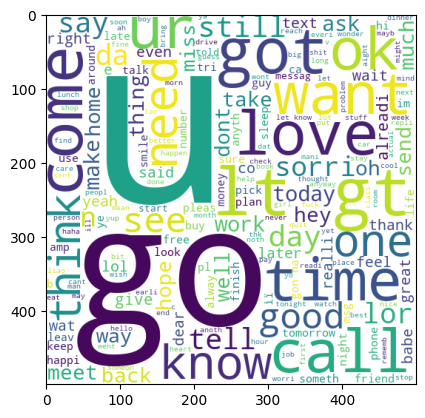

In [141]:
plt.imshow(ham_wordcloud)

In [142]:
df.head()

,target,text,num_of_characters,num_of_words,num_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [143]:
spam_corpus = []
for msg in df[df["target"] == 1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [144]:
from collections import Counter

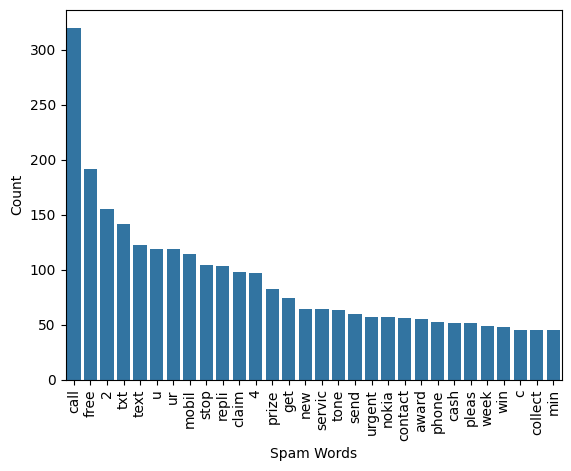

In [145]:
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xlabel("Spam Words")
plt.ylabel("Count")
plt.xticks(rotation="vertical")
plt.show()

In [146]:
ham_corpus = []
for msg in df[df["target"] == 0]["transformed_text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)

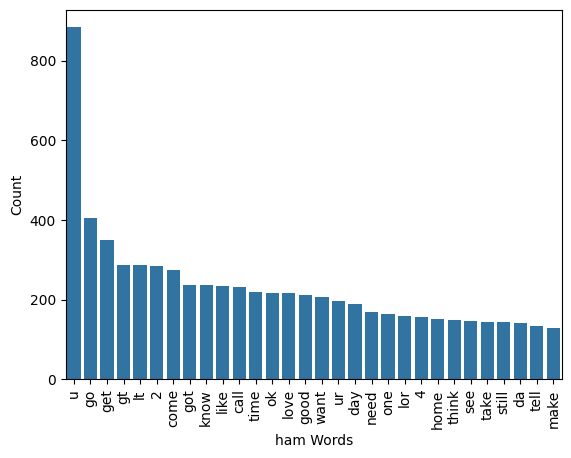

In [147]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xlabel("ham Words")
plt.ylabel("Count")
plt.xticks(rotation="vertical")
plt.show()

# 4. Model Building

In [148]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [149]:
cv = CountVectorizer()
tf = TfidfVectorizer(max_features=3000)

In [150]:
X = tf.fit_transform(df["transformed_text"]).toarray()

In [151]:
X.shape

(5169, 3000)

In [152]:
y = df["target"].values

In [153]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [156]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score

In [157]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [158]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [159]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [160]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [161]:
import pickle

In [162]:
pickle.dump(tf,open("vectorizer.pkl","wb"))
pickle.dump(mnb,open("model.pkl","wb"))